In [1]:
import pulp

http://yetanothermathprogrammingconsultant.blogspot.com/2017/09/numberlink-models.html

# Data

In [2]:
T = [
    [0,0,0,4,0,0,0],
    [0,3,0,0,2,5,0],
    [0,0,0,3,1,0,0],
    [0,0,0,5,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [2,0,0,0,4,0,0],
]

In [3]:
T

[[0, 0, 0, 4, 0, 0, 0],
 [0, 3, 0, 0, 2, 5, 0],
 [0, 0, 0, 3, 1, 0, 0],
 [0, 0, 0, 5, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0],
 [2, 0, 0, 0, 4, 0, 0]]

In [4]:
cells = [(i,j) for i in range(len(T)) for j in range(len(T))]

In [5]:
cells[0][0]

0

In [6]:
T[cells[0][0]][cells[0][1]]

0

In [7]:
#for (i,j) in cells:
    #print(T[i][j],)

In [8]:
neighbours = {}
for (i,j) in cells:
    #neighbours[(i,j)] = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
    neighbours[(i,j)] = [(i+k,j+h) for k in [-1,0,1] for h in [-1,0,1] if k+h!=0 and k*h!=1 and i+k>=0 and i+k<=6 and j+h>=0 and j+h<=6 ]
neighbours

{(0, 0): [(0, 1), (1, 0)],
 (0, 1): [(0, 0), (0, 2), (1, 1)],
 (0, 2): [(0, 1), (0, 3), (1, 2)],
 (0, 3): [(0, 2), (0, 4), (1, 3)],
 (0, 4): [(0, 3), (0, 5), (1, 4)],
 (0, 5): [(0, 4), (0, 6), (1, 5)],
 (0, 6): [(0, 5), (1, 6)],
 (1, 0): [(0, 0), (1, 1), (2, 0)],
 (1, 1): [(0, 1), (1, 0), (1, 2), (2, 1)],
 (1, 2): [(0, 2), (1, 1), (1, 3), (2, 2)],
 (1, 3): [(0, 3), (1, 2), (1, 4), (2, 3)],
 (1, 4): [(0, 4), (1, 3), (1, 5), (2, 4)],
 (1, 5): [(0, 5), (1, 4), (1, 6), (2, 5)],
 (1, 6): [(0, 6), (1, 5), (2, 6)],
 (2, 0): [(1, 0), (2, 1), (3, 0)],
 (2, 1): [(1, 1), (2, 0), (2, 2), (3, 1)],
 (2, 2): [(1, 2), (2, 1), (2, 3), (3, 2)],
 (2, 3): [(1, 3), (2, 2), (2, 4), (3, 3)],
 (2, 4): [(1, 4), (2, 3), (2, 5), (3, 4)],
 (2, 5): [(1, 5), (2, 4), (2, 6), (3, 5)],
 (2, 6): [(1, 6), (2, 5), (3, 6)],
 (3, 0): [(2, 0), (3, 1), (4, 0)],
 (3, 1): [(2, 1), (3, 0), (3, 2), (4, 1)],
 (3, 2): [(2, 2), (3, 1), (3, 3), (4, 2)],
 (3, 3): [(2, 3), (3, 2), (3, 4), (4, 3)],
 (3, 4): [(2, 4), (3, 3), (3, 5), (4,

In [9]:
paths = [p for p in range(1,6)]

# MIP

In [10]:
# create problem
prob = pulp.LpProblem("numberlink", pulp.LpMaximize)

# define variables
x = pulp.LpVariable.dicts("x",(cells,paths),cat=pulp.LpBinary)

# objective function
prob += 0

# each cell has a unique number
for (i,j) in cells:
    prob += pulp.lpSum(x[(i,j)][k] for k in paths) == 1
    
# enforce endpoints
for (i,j) in cells:
    val = T[i][j]
    if val > 0:
        prob += x[(i,j)][val] == 1
        
# if cell is an endpoint, then one neighbor must have same value
for (i,j) in cells:
    val = T[i][j]
    if val > 0:
        prob += pulp.lpSum(x[(u,v)][val] for (u,v) in neighbours[(i,j)]) == 1
        
# if cell is not an end point, then 2 neighbours must have same value
for (i,j) in cells:
    val = T[i][j]
    if val == 0:
        for k in paths:
            prob += pulp.lpSum(x[(u,v)][k] for (u,v) in neighbours[(i,j)]) >= 2*x[(i,j)][k]
            prob += pulp.lpSum(x[(u,v)][k] for (u,v) in neighbours[(i,j)]) <= 2*x[(i,j)][k]+4*(1-x[(i,j)][k])

In [11]:
prob

numberlink:
MAXIMIZE
0
SUBJECT TO
_C1: x_(0,_0)_1 + x_(0,_0)_2 + x_(0,_0)_3 + x_(0,_0)_4 + x_(0,_0)_5 = 1

_C2: x_(0,_1)_1 + x_(0,_1)_2 + x_(0,_1)_3 + x_(0,_1)_4 + x_(0,_1)_5 = 1

_C3: x_(0,_2)_1 + x_(0,_2)_2 + x_(0,_2)_3 + x_(0,_2)_4 + x_(0,_2)_5 = 1

_C4: x_(0,_3)_1 + x_(0,_3)_2 + x_(0,_3)_3 + x_(0,_3)_4 + x_(0,_3)_5 = 1

_C5: x_(0,_4)_1 + x_(0,_4)_2 + x_(0,_4)_3 + x_(0,_4)_4 + x_(0,_4)_5 = 1

_C6: x_(0,_5)_1 + x_(0,_5)_2 + x_(0,_5)_3 + x_(0,_5)_4 + x_(0,_5)_5 = 1

_C7: x_(0,_6)_1 + x_(0,_6)_2 + x_(0,_6)_3 + x_(0,_6)_4 + x_(0,_6)_5 = 1

_C8: x_(1,_0)_1 + x_(1,_0)_2 + x_(1,_0)_3 + x_(1,_0)_4 + x_(1,_0)_5 = 1

_C9: x_(1,_1)_1 + x_(1,_1)_2 + x_(1,_1)_3 + x_(1,_1)_4 + x_(1,_1)_5 = 1

_C10: x_(1,_2)_1 + x_(1,_2)_2 + x_(1,_2)_3 + x_(1,_2)_4 + x_(1,_2)_5 = 1

_C11: x_(1,_3)_1 + x_(1,_3)_2 + x_(1,_3)_3 + x_(1,_3)_4 + x_(1,_3)_5 = 1

_C12: x_(1,_4)_1 + x_(1,_4)_2 + x_(1,_4)_3 + x_(1,_4)_4 + x_(1,_4)_5 = 1

_C13: x_(1,_5)_1 + x_(1,_5)_2 + x_(1,_5)_3 + x_(1,_5)_4 + x_(1,_5)_5 = 1

_C14: x_(1,_6

In [12]:
prob.solve()

1

In [13]:
Tsol=T.copy()

In [14]:
for (i,j) in cells:
    for k in paths:
        val = pulp.value(x[(i,j)][k])
        if val >0.9:
            # print(i,j,"-->",k)
            Tsol[i][j]=k
Tsol

[[2, 2, 2, 4, 4, 4, 4],
 [2, 3, 2, 2, 2, 5, 4],
 [2, 3, 3, 3, 1, 5, 4],
 [2, 5, 5, 5, 1, 5, 4],
 [2, 5, 1, 1, 1, 5, 4],
 [2, 5, 1, 5, 5, 5, 4],
 [2, 5, 5, 5, 4, 4, 4]]

# Data as a graph

In [15]:
import networkx as nx

In [16]:
T = [
    [0,0,0,4,0,0,0],
    [0,3,0,0,2,5,0],
    [0,0,0,3,1,0,0],
    [0,0,0,5,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [2,0,0,0,4,0,0],
]

In [17]:
T = [
    [0,0,0,10,0,0,0,0,0,0,11,0,0,0,0],
    [0,3,0,6,0,0,0,0,0,0,0,0,0,0,11],
    [0,0,0,0,0,0,0,0,0,0,0,0,6,0,0],
    [0,0,0,0,0,0,0,0,2,0,0,0,0,12,0],
    [0,0,0,0,0,0,0,0,0,0,0,9,0,0,0],
    [4,0,0,0,4,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,9,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,12,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,7,0],
    [0,0,0,0,2,0,0,0,0,0,10,8,0,0,0],
    [0,0,0,0,0,0,0,0,5,8,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,3,5,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,7,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
T

[[0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0],
 [0, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 12, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0],
 [4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 12, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
 [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 10, 8, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [18]:
G=nx.grid_2d_graph(len(T),len(T))

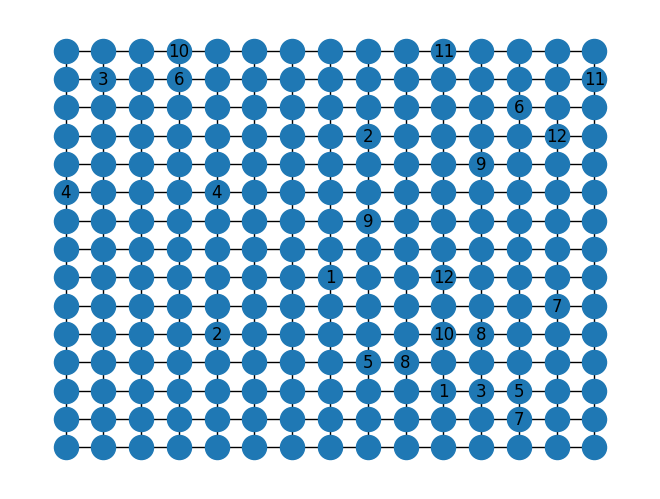

In [19]:
for v in G.nodes():
    G.nodes[v]["layer"]=v[0]
    val = T[v[1]][v[0]]
    if val > 0:
        G.nodes[v]["value"]=val
    else:
        G.nodes[v]["value"]=""
nx.draw(G,pos=nx.multipartite_layout(G,subset_key="layer"),
          labels = nx.get_node_attributes(G, 'value') )

In [20]:
paths = [p for p in range(1,max(G.nodes[v]["value"] for v in G.nodes() if G.nodes[v]["value"])+1)]
paths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [21]:
# create problem
prob = pulp.LpProblem("numberlink", pulp.LpMaximize)

# define variables
x = pulp.LpVariable.dicts("x",(G.nodes(),paths),cat=pulp.LpBinary)

# objective function
prob += 0

# each cell has a unique number
for (i,j) in G.nodes():
    prob += pulp.lpSum(x[(i,j)][k] for k in paths) == 1
    
# enforce endpoints
for (i,j) in G.nodes():
    val = G.nodes[(i,j)]["value"]
    if val:
        prob += x[(i,j)][val] == 1
        
# if cell is an endpoint, then one neighbor must have same value
for (i,j) in G.nodes():
    val = G.nodes[(i,j)]["value"]
    if val:
        prob += pulp.lpSum(x[(u,v)][val] for (u,v) in G.neighbors((i,j))) == 1
        
# if cell is not an end point, then 2 neighbours must have same value
for (i,j) in G.nodes():
    val = G.nodes[(i,j)]["value"]
    if not val:
        for k in paths:
            prob += pulp.lpSum(x[(u,v)][k] for (u,v) in G.neighbors((i,j))) >= 2*x[(i,j)][k]
            prob += pulp.lpSum(x[(u,v)][k] for (u,v) in G.neighbors((i,j))) <= 2*x[(i,j)][k]+4*(1-x[(i,j)][k])

In [22]:
# prob.writeLP("prob.lp")

In [23]:
prob.solve(solver = pulp.GUROBI_CMD())

1

In [24]:
for (i,j) in G.nodes():
    for k in paths:
        val = pulp.value(x[(i,j)][k])
        if val >0.9:
            G.nodes[(i,j)]["value"]=k

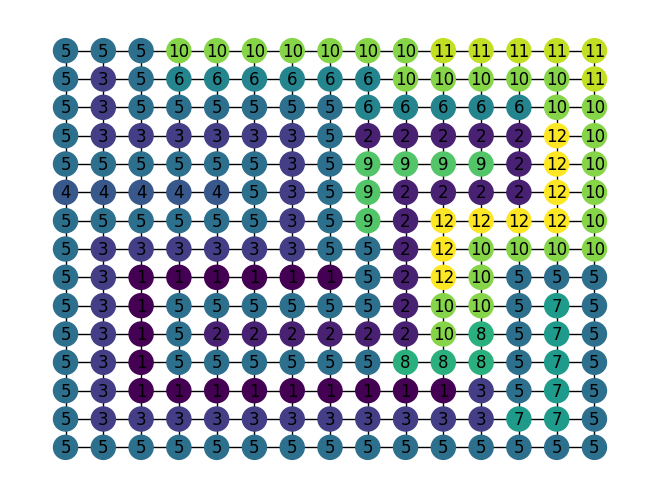

In [25]:
nx.draw(G,pos=nx.multipartite_layout(G,subset_key="layer"),
          labels = nx.get_node_attributes(G, 'value'),
          node_color=[G.nodes[(i,j)]["value"] for (i,j) in G.nodes()])

# MIP 2

In [2]:
import networkx as nx

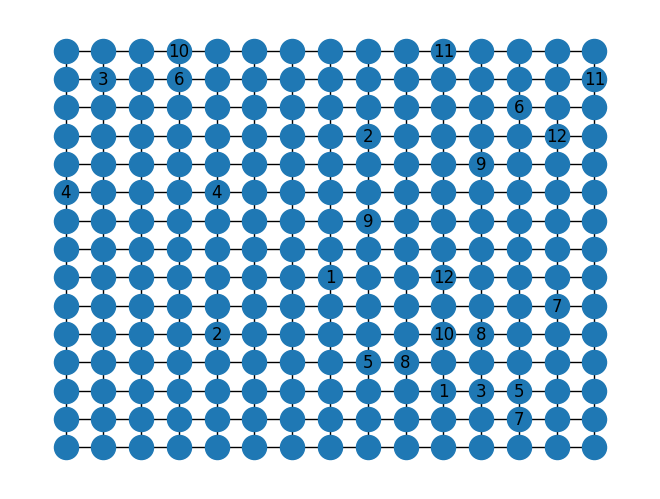

In [3]:
T = [
    [0,0,0,4,0,0,0],
    [0,3,0,0,2,5,0],
    [0,0,0,3,1,0,0],
    [0,0,0,5,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [2,0,0,0,4,0,0],
]
T = [
    [0,0,0,10,0,0,0,0,0,0,11,0,0,0,0],
    [0,3,0,6,0,0,0,0,0,0,0,0,0,0,11],
    [0,0,0,0,0,0,0,0,0,0,0,0,6,0,0],
    [0,0,0,0,0,0,0,0,2,0,0,0,0,12,0],
    [0,0,0,0,0,0,0,0,0,0,0,9,0,0,0],
    [4,0,0,0,4,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,9,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,12,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,7,0],
    [0,0,0,0,2,0,0,0,0,0,10,8,0,0,0],
    [0,0,0,0,0,0,0,0,5,8,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,3,5,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,7,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
G=nx.grid_2d_graph(len(T),len(T))
for v in G.nodes():
    G.nodes[v]["layer"]=v[0]
    val = T[v[1]][v[0]]
    if val > 0:
        G.nodes[v]["value"]=val
    else:
        G.nodes[v]["value"]=""
nx.draw(G,pos=nx.multipartite_layout(G,subset_key="layer"),
          labels = nx.get_node_attributes(G, 'value') )

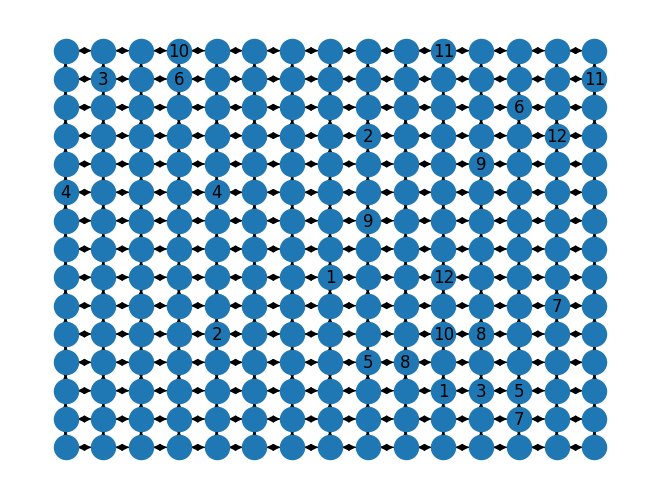

In [4]:
G=G.to_directed()
nx.draw(G,pos=nx.multipartite_layout(G,subset_key="layer"),
          labels = nx.get_node_attributes(G, 'value') )

In [5]:
paths = [p for p in range(1,max(G.nodes[v]["value"] for v in G.nodes() if G.nodes[v]["value"])+1)]
paths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [6]:
[v for v in G.nodes() if G.nodes[v]["value"]]

[(0, 5),
 (1, 1),
 (3, 0),
 (3, 1),
 (4, 5),
 (4, 10),
 (7, 8),
 (8, 3),
 (8, 6),
 (8, 11),
 (9, 11),
 (10, 0),
 (10, 8),
 (10, 10),
 (10, 12),
 (11, 4),
 (11, 10),
 (11, 12),
 (12, 2),
 (12, 12),
 (12, 13),
 (13, 3),
 (13, 9),
 (14, 1)]

In [7]:
endpoints_pairs = [(u,v) for u in G.nodes() for v in G.nodes() if u<v and G.nodes[u]["value"] and G.nodes[v]["value"] and G.nodes[u]["value"]==G.nodes[v]["value"]]
endpoints = {}
for (u,v) in endpoints_pairs:
    endpoints[(u,v)]=G.nodes[u]["value"]
endpoints              

{((0, 5), (4, 5)): 4,
 ((1, 1), (11, 12)): 3,
 ((3, 0), (10, 10)): 10,
 ((3, 1), (12, 2)): 6,
 ((4, 10), (8, 3)): 2,
 ((7, 8), (10, 12)): 1,
 ((8, 6), (11, 4)): 9,
 ((8, 11), (12, 12)): 5,
 ((9, 11), (11, 10)): 8,
 ((10, 0), (14, 1)): 11,
 ((10, 8), (13, 3)): 12,
 ((12, 13), (13, 9)): 7}

In [8]:
# create problem
prob = pulp.LpProblem("numberlink", pulp.LpMaximize)

# define variables
x = pulp.LpVariable.dicts("x",(G.edges(),paths),cat=pulp.LpBinary)
y = pulp.LpVariable.dicts("y",(G.nodes(),paths),cat=pulp.LpBinary)
s = pulp.LpVariable.dicts("s",([v for v in G.nodes() if G.nodes[v]["value"]],paths),cat=pulp.LpBinary)

# objective function
prob += 0

# one number per cell
for u in G.nodes():
    prob += pulp.lpSum(y[u][k] for k in paths) == 1
    
# enforce endpoints
for u in G.nodes():
    val = G.nodes[u]["value"]
    if val:
        prob += y[u][val] == 1
        
# flow conservation constraints 
for u in G.nodes():
    val = G.nodes[u]["value"]
    if val:
        k = val
        prob += pulp.lpSum(x[(u,v)][k] for v in G.successors(u))==s[u][k]
        prob += pulp.lpSum(x[(v,u)][k] for v in G.predecessors(u))==1-s[u][k]
    else:
        for k in paths:
            prob += pulp.lpSum(x[(u,v)][k] for v in G.successors(u))==pulp.lpSum(x[(v,u)][k] for v in G.predecessors(u))
            
# for each pair of endpoints, one source and one sink
for (u,v) in endpoints:
    k = endpoints[(u,v)]
    prob += s[u][k]+s[v][k]==1
    
for (i,j) in G.edges():
    for k in paths:
        prob += x[(i,j)][k]<=y[i][k]
        prob += x[(i,j)][k]<=y[j][k]

for k in paths:
    for i in G.nodes():
        prob += y[i][k] <= pulp.lpSum(x[(i,j)][k] for j in G.successors(i))+pulp.lpSum(x[(j,i)][k] for j in G.predecessors(i))

In [ ]:
prob.solve(solver = pulp.GUROBI_CMD(timeLimit=20))

In [93]:
#prob

In [94]:
for (i,j) in G.nodes():
    for k in paths:
        val = pulp.value(y[(i,j)][k])
        if val >0.9:
            G.nodes[(i,j)]["value"]=k
for (i,j) in x:
    remove=True
    for k in x[(i,j)]:
        val = pulp.value(x[(i,j)][k])
        if val >0.9:
            remove=False
    if remove:
        G.remove_edge(i,j)

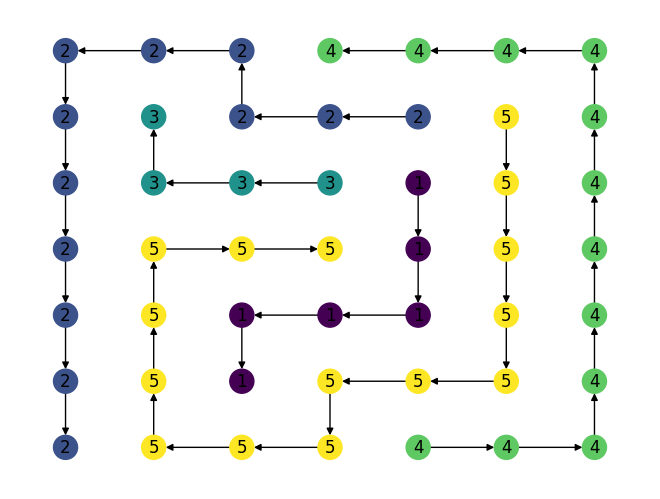

In [95]:
nx.draw(G,pos=nx.multipartite_layout(G,subset_key="layer"),
          labels = nx.get_node_attributes(G, 'value'),
          node_color=[G.nodes[(i,j)]["value"] for (i,j) in G.nodes()])